In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [3]:
df=pd.read_csv('apy_2.csv',index_col=False)
df

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Karnataka,UDUPI,2005,Rabi,Horse-gram,1122.0,836.0
1,1,Madhya Pradesh,GWALIOR,2003,Whole Year,Brinjal,194.0,0.0
2,2,Andhra Pradesh,CHITTOOR,2010,Rabi,Sesamum,334.0,118.0
3,3,Andhra Pradesh,KRISHNA,2014,Rabi,Tomato,538.0,7289.0
4,4,Uttar Pradesh,SULTANPUR,2011,Rabi,Coriander,59.0,33.0
...,...,...,...,...,...,...,...,...
73822,73822,Uttar Pradesh,SULTANPUR,2001,Rabi,Rapeseed &Mustard,3727.0,3239.0
73823,73823,Chhattisgarh,DURG,2014,Rabi,Wheat,6364.0,7367.0
73824,73824,Uttar Pradesh,RAE BARELI,2010,Summer,Moong(Green Gram),489.0,224.0
73825,73825,Assam,KAMRUP,1998,Rabi,Wheat,6431.0,6940.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72679 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0          0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1148
dtype: int64

# Which of these are produced during the Summer season? 

In [6]:
a=df[df['Season']=='Summer     ']
a['Crop'].unique()

array(['Groundnut', 'Maize', 'Rice', 'Sesamum', 'Wheat', 'Onion', 'Urad',
       'Peas & beans (Pulses)', 'Sunflower', 'Ragi', 'Bajra',
       'Moong(Green Gram)', 'Cotton(lint)', 'Jowar', 'Cowpea(Lobia)',
       'Tobacco', 'Horse-gram', 'Dry chillies', 'Paddy', 'Turmeric',
       'Arhar/Tur', 'Banana', 'Potato', 'Dry ginger', 'Brinjal',
       'Sugarcane', 'Other  Rabi pulses', 'Small millets',
       'Total foodgrain'], dtype=object)

# During which year did Haryana have the highest crop production?

In [7]:
df2=df[df["State_Name"]=='Haryana']
df2=df2.groupby(['Crop_Year'])['Production'].sum().sort_values(ascending=False).reset_index().head(5)
df2

,Crop_Year,Production
0,2008,9647100.0
1,2005,9328300.0
2,2011,9021300.0
3,2003,8437562.0
4,2012,7996416.0


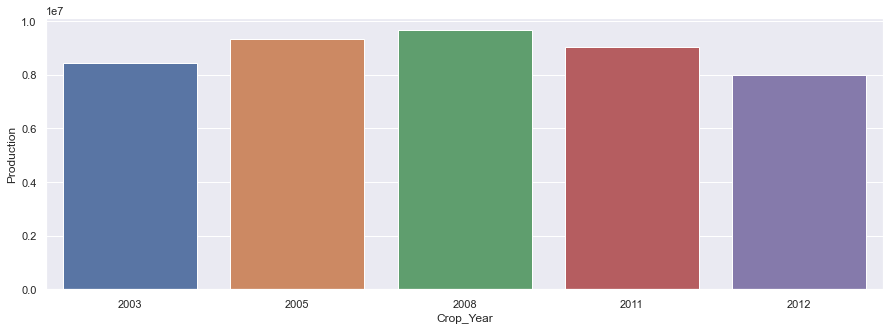

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=df2['Crop_Year'],y=df2['Production']);


# The maximum and minimum area for production were in the years?

In [15]:
f=df.groupby(['Crop_Year'])['Area'].sum().sort_values(ascending=False).reset_index()
f

,Crop_Year,Area
0,1997,68245111.00
1,2004,53455831.24
2,1999,51879784.00
3,2006,51401478.02
4,2009,50830428.00
5,2010,50822115.30
6,2000,50532695.00
7,2003,49949582.97
8,2008,49740683.00
9,1998,49323316.00


# Which state in India had the second lowest crop production?

In [141]:
y=df.groupby(['State_Name'])['Production'].sum().sort_values(ascending=False).reset_index().tail(3)
y

,State_Name,Production
30,Sikkim,550725.00
31,Mizoram,457942.76
32,Chandigarh,15804.50


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


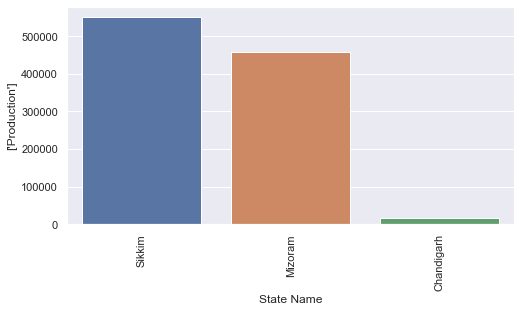

In [143]:
plt.figure(figsize=(8,4))
sns.barplot(y['State_Name'],y['Production'])
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel(['Production'])
plt.show();

# What were the top three produced crops in the year 2012?

In [18]:
d=df[df['Crop_Year']==2012]
d

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
26,26,Nagaland,KIPHIRE,2012,Rabi,Rapeseed &Mustard,1190.0,1200.0
44,44,Madhya Pradesh,HOSHANGABAD,2012,Whole Year,Coriander,305.0,143.0
74,74,Chhattisgarh,DHAMTARI,2012,Kharif,Horse-gram,124.0,42.0
76,76,Uttarakhand,UDAM SINGH NAGAR,2012,Rabi,Gram,28.0,17.0
94,94,Tamil Nadu,KRISHNAGIRI,2012,Kharif,Urad,4162.0,2381.0
...,...,...,...,...,...,...,...,...
73724,73724,Uttar Pradesh,UNNAO,2012,Rabi,Garlic,287.0,1491.0
73769,73769,Karnataka,BENGALURU URBAN,2012,Whole Year,Dry ginger,5.0,159.0
73771,73771,Meghalaya,SOUTH GARO HILLS,2012,Whole Year,Turmeric,87.0,492.0
73805,73805,Andhra Pradesh,KRISHNA,2012,Rabi,Tomato,880.0,8569.0


In [24]:
d.groupby(['Crop'])['Production'].sum().sort_values(ascending=False).reset_index().head(3)

,Crop,Production
0,Coconut,1.208299e+09
1,Sugarcane,1.143474e+08
2,Rice,3.371318e+07


# What is the standard deviation for Area of production?

In [35]:
df['Area'].describe()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_11552/2682258239.py, line 1)

# Which is the crop that gave the highest production to the state of Andhra Pradesh?

In [55]:
a=df[df['State_Name']=='Andhra Pradesh']
a

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,2,Andhra Pradesh,CHITTOOR,2010,Rabi,Sesamum,334.0,118.0
3,3,Andhra Pradesh,KRISHNA,2014,Rabi,Tomato,538.0,7289.0
86,86,Andhra Pradesh,KURNOOL,2011,Kharif,Moong(Green Gram),1284.0,824.0
126,126,Andhra Pradesh,CHITTOOR,2000,Whole Year,Cashewnut,126.0,27.0
175,175,Andhra Pradesh,CHITTOOR,2007,Kharif,Horse-gram,4000.0,2000.0
...,...,...,...,...,...,...,...,...
73681,73681,Andhra Pradesh,SPSR NELLORE,2006,Whole Year,Sugarcane,10395.0,1189593.0
73713,73713,Andhra Pradesh,KRISHNA,2005,Kharif,Cotton(lint),45825.0,88415.0
73787,73787,Andhra Pradesh,PRAKASAM,2006,Rabi,Jowar,2326.0,2410.0
73805,73805,Andhra Pradesh,KRISHNA,2012,Rabi,Tomato,880.0,8569.0


In [46]:
b=a.groupby(['Crop'])['Production'].sum().sort_values(ascending=False).reset_index()
b

,Crop,Production
0,Rice,38709052.2
1,Maize,4840564.0
2,Groundnut,2083123.3
3,Bajra,1779222.0
4,Paddy,1638436.0
5,Moong(Green Gram),735738.3
6,Sesamum,618864.8
7,Onion,596379.0
8,Banana,272080.0
9,Sunflower,170886.0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


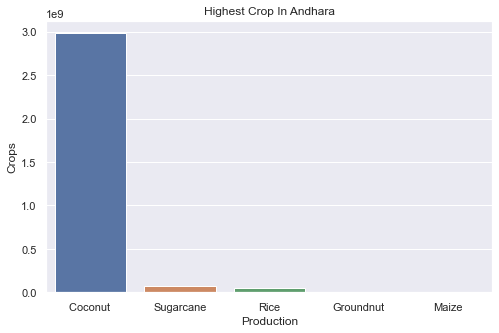

In [70]:
plt.figure(figsize=(8,5))
plt.title('Highest Crop In Andhara')
sns.barplot(c['Crop'],c['Production']);
plt.xlabel('Production')
plt.ylabel('Crops')
plt.show()

In [ ]:
# Which of the following statements is true? (Select all that applies)
# The overall production during the Kharif season is 2,029,970,000 (approx.)
# The overall production during the Summer season is 51,992,900 (approx.)
# The overall production during the Autumn season is 14,413,770 (approx.)
# The overall production during the Kharif season is 1,282,056,700 (approx.)

In [194]:
# a=df[df['Season']=='Kharif     ']
b=df[df['Season']=='Summer     ']
d=df[df['Season']=='Autumn     ']
print('The overall production during the Kharif season is','(',a['Production'].sum(),')')
print('The overall production during the Summer season is','(',b['Production'].sum(),')')
print('The overall production during the Autmn season is','(',d['Production'].sum(),')')

The overall production during the Kharif season is ( 1282056680.69 )
The overall production during the Summer season is ( 51992876.7 )
The overall production during the Autmn season is ( 18896594.060000002 )


# Which state has the lowest area of production?

In [216]:
y=df.groupby(['State_Name'])['Production'].sum().sort_values(ascending=True).reset_index()
z=y.iloc[0:5]

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


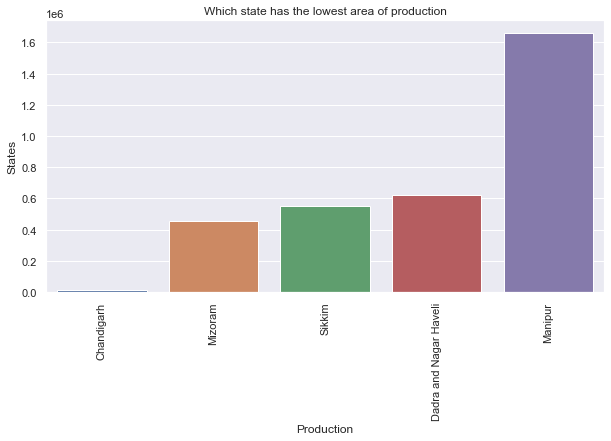

In [227]:
plt.figure(figsize=(10,5))
plt.title('Which state has the lowest area of production')
sns.barplot(z['State_Name'],z['Production'])
plt.xticks(rotation=90)
plt.yticks(label=None)
plt.xlabel('Production')
plt.ylabel('States')
plt.show()

In [200]:
x=df[df['State_Name']=='Chandigarh']

In [201]:
x['Production'].sum()

15804.5

#  What is the mean for the area of production?


In [231]:
df[['Production']].mean()

Production    442613.777564
dtype: float64

# What is the correlation coefficient between Area and Production?

# Which is the only crop that has the highest production during autumn, summer, and winter?

In [267]:
f=df.groupby(['Season','Crop'])['Production'].sum().reset_index()
f

,Season,Crop,Production
0,Autumn,Arhar/Tur,3.937000e+03
1,Autumn,Banana,3.980000e+03
2,Autumn,Dry chillies,1.051300e+04
3,Autumn,Dry ginger,3.600000e+02
4,Autumn,Groundnut,9.796850e+04
5,Autumn,Jute,1.552109e+05
6,Autumn,Maize,3.089101e+06
7,Autumn,Moong(Green Gram),2.479950e+04
8,Autumn,Onion,2.000000e+01
9,Autumn,Paddy,5.211400e+05


In [268]:
f['Season']

0      Autumn     
1      Autumn     
2      Autumn     
3      Autumn     
4      Autumn     
5      Autumn     
6      Autumn     
7      Autumn     
8      Autumn     
9      Autumn     
10     Autumn     
11     Autumn     
12     Autumn     
13     Autumn     
14     Autumn     
15     Autumn     
16     Autumn     
17     Autumn     
18     Autumn     
19     Autumn     
20     Kharif     
21     Kharif     
22     Kharif     
23     Kharif     
24     Kharif     
25     Kharif     
26     Kharif     
27     Kharif     
28     Kharif     
29     Kharif     
30     Kharif     
31     Kharif     
32     Kharif     
33     Kharif     
34     Kharif     
35     Kharif     
36     Kharif     
37     Kharif     
38     Kharif     
39     Kharif     
40     Kharif     
41     Kharif     
42     Kharif     
43     Kharif     
44     Kharif     
45     Kharif     
46     Kharif     
47     Kharif     
48     Kharif     
49     Kharif     
50     Kharif     
51     Kharif     
52     Khari

#  * Highest Production

In [12]:
df[df['Production']==1001000000.0]

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
66212,66212,Kerala,KOZHIKODE,2014,Whole Year,Coconut,123066.0,1.001000e+09
